In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import warnings
from os.path import join, dirname, abspath
from PIL.Image import open, fromarray, new
from collinearity import SelectNonCollinear
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# 1.


## (a) Preparing data


In [2]:
try:
    path_ = os.getcwd()+'/ORL Faces'
except:
    print('Set path_ to your ORL Faces fold directory')

In [3]:
df = pd.DataFrame()

for people in range(1, 41):
    for order in range(1, 11):
        im = open(path_+'/'+str(people)+'_'+str(order)+'.png')
        ar = pd.DataFrame(np.mat(np.asarray(im)).flatten(), columns=[
                          r for r in range(1, 2577)], index=[(people-1)*10+order])
        df = pd.concat([df, ar], axis=0)
    # print(df)
df

,1,2,3,4,5,6,7,8,9,10,...,2567,2568,2569,2570,2571,2572,2573,2574,2575,2576
1,88,88,90,91,91,92,90,93,99,109,...,168,176,166,149,142,145,141,138,142,134
2,87,90,95,96,92,90,97,107,111,112,...,167,175,172,147,131,132,124,124,120,88
3,92,92,88,98,104,109,108,100,80,63,...,111,84,128,154,161,169,170,165,146,151
4,92,96,93,94,99,105,108,109,121,152,...,154,153,164,163,165,166,161,157,79,54
5,83,75,88,91,101,90,86,80,63,58,...,141,145,148,151,139,134,173,167,176,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,124,124,125,123,124,125,123,124,123,122,...,57,34,63,37,37,37,38,39,38,40
397,128,128,128,128,129,128,129,127,127,127,...,96,92,90,90,91,91,91,91,92,93
398,122,123,124,124,123,123,122,126,130,126,...,68,24,57,41,37,36,37,38,40,38
399,120,119,121,119,120,121,122,117,111,100,...,146,137,134,101,26,77,95,95,92,90


In [4]:
gender = [0]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [0]*10 + [1]*10 + [0]*10 + \
    [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10+[1]*10 + [1]*10 + \
    [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1] * 10 + \
    [1]*10 + [0]*10 + [1]*10 + [1]*10 + [1] * 10 + \
    [1]*10 + [1]*10 + [1]*10 + [1]*10 + [1]*10

In [5]:
df['gender'] = gender
df.head()

,1,2,3,4,5,6,7,8,9,10,...,2568,2569,2570,2571,2572,2573,2574,2575,2576,gender
1,88,88,90,91,91,92,90,93,99,109,...,176,166,149,142,145,141,138,142,134,0
2,87,90,95,96,92,90,97,107,111,112,...,175,172,147,131,132,124,124,120,88,0
3,92,92,88,98,104,109,108,100,80,63,...,84,128,154,161,169,170,165,146,151,0
4,92,96,93,94,99,105,108,109,121,152,...,153,164,163,165,166,161,157,79,54,0
5,83,75,88,91,101,90,86,80,63,58,...,145,148,151,139,134,173,167,176,188,0


## (b) Regrssion analysis


In [6]:
corr = df.corr()
corr = np.tril(corr)

### Plot heatmap


In [7]:

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(200, 200))
# sns.heatmap(corr, vmin=-1, vmax=1, cmap='vlag', ax=ax,
#             xticklabels='auto', yticklabels='auto', annot=False, cbar=True)

### regression


In [8]:

def reg(df):

    X = df.drop(['gender'], axis=1)
    y = df['gender']

    X = sm.add_constant(X)

    # regression
    lig_model = sm.OLS(y, X)
    result_ = lig_model.fit()

    print('R2: ', result_.rsquared_adj)
    print(result_.summary())

In [9]:
reg(df)

R2:  nan
                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                nan
Time:                        21:05:04   Log-Likelihood:                 12839.
No. Observations:                 400   AIC:                        -2.488e+04
Df Residuals:                       0   BIC:                        -2.328e+04
Df Model:                         399                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.245e-06        inf          0

畫出之後可以明顯地看到很多 variables 之間的相關性都很高，所以在這個 dataset 有很大的機率有高共線性問題(不過因為參數眾多畫出來的圖很擠，所以就 comment 掉)，且做了 regression 之後證實了這一點，若無對共線性做處理無法做 regression。下面為消除共線性採用的方法


In [10]:
from sklearn.feature_selection import f_regression

X = df.drop(['gender'], axis=1)
y = df['gender']
# concern about collinear problems, the procees is to deal with this
# select the features which corelations is lower than 0.4


def corr_elimination(threhold):
    selector = SelectNonCollinear(
        correlation_threshold=threhold, scoring=f_regression)
    selector.fit(X.values, y.values)
    mask = selector.get_support()

    # 將會影響模型可解釋性的變數名稱加至constant_columns中
    constant_columns = [col for col in X.columns[mask]]
    df_2 = df[constant_columns]

    df_eliminate_correlation = pd.concat([df_2, y], axis=1)
    return df_eliminate_correlation


### After eliminate some high correlation variables with threshold 0.4


<AxesSubplot: >

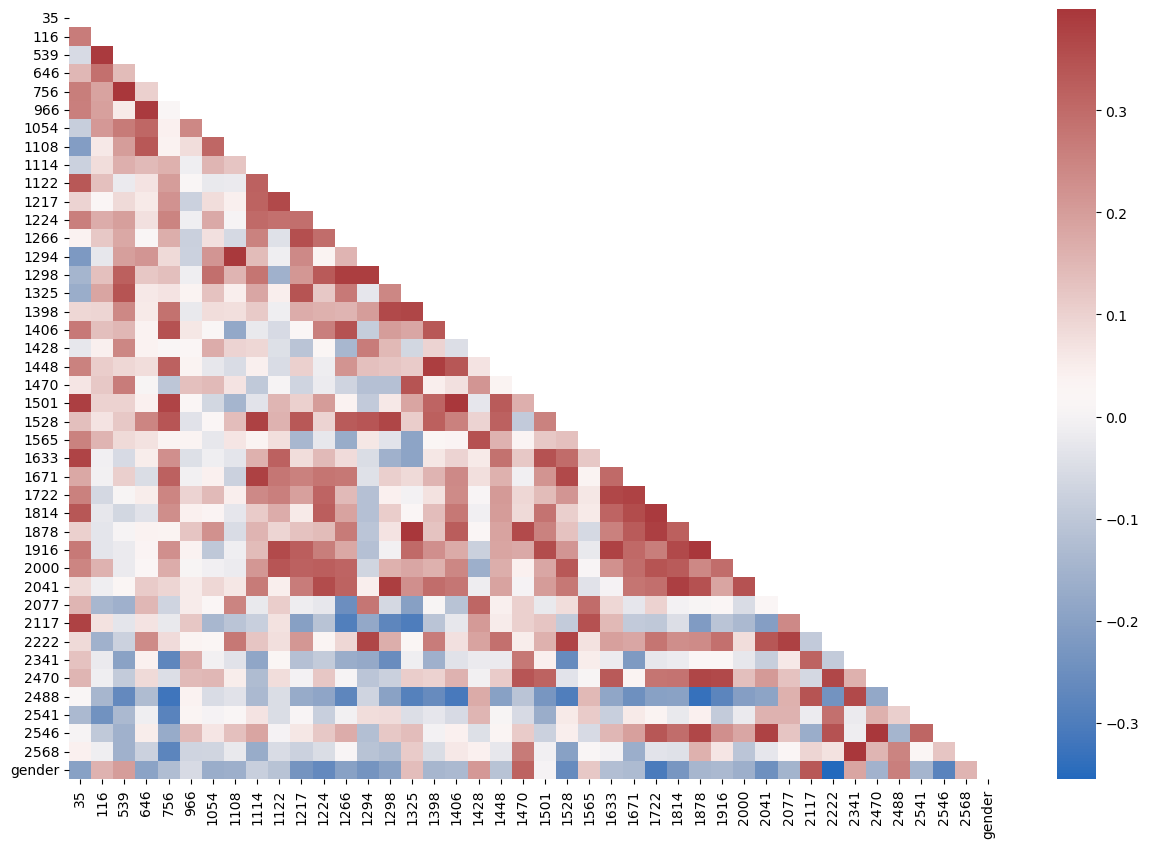

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
df_new = corr_elimination(0.4)
corr = df_new.corr()
tri = np.triu(corr)

sns.heatmap(corr, annot=False, cmap='vlag',
            mask=tri, cbar=True)

highest correlation: approximately 0.4\
loweast correlation: approximately -0.4


#### Regression


In [12]:
reg(df_new)

R2:  0.5884523236880058
                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     14.91
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           2.20e-55
Time:                        21:05:05   Log-Likelihood:                 113.27
No. Observations:                 400   AIC:                            -142.5
Df Residuals:                     358   BIC:                             25.11
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9918      0

從這個結果顯示出將 correlation 0.4 以上的 variables 刪除後做 regression，其 model 之 adj R_square 僅 0.588，代表這個 model 的解釋能力不是說很好，這結果產生的原因可能為 threhold 0.4 設的太小，將有用的參數不小心刪除掉，故將 threhold 改為 0.6 重新跑 regression 看結果如何


### After eliminate some high correlation variables with threshold 0.6


In [13]:
df_new = corr_elimination(0.6)

In [14]:
reg(df_new)

R2:  0.7321404923601005
                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     8.521
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           6.19e-49
Time:                        21:05:06   Log-Likelihood:                 267.80
No. Observations:                 400   AIC:                            -243.6
Df Residuals:                     254   BIC:                             339.2
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2592      0

結果顯示 adj R_square 有顯著提升，再繼續嘗試將 threhold 改為 0.8


### After eliminate some high correlation variables with threshold 0.8


In [15]:
df_new = corr_elimination(0.8)
reg(df_new)

R2:  nan
                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                nan
Time:                        21:05:13   Log-Likelihood:                 12382.
No. Observations:                 400   AIC:                        -2.396e+04
Df Residuals:                       0   BIC:                        -2.237e+04
Df Model:                         399                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001        inf          0

共線性太強烈，所以 threhold 改為 0.8 並非個好選擇，嘗試更改 threhold 為 0.7


### After eliminate some high correlation variables with threshold 0.7


In [16]:
df_new = corr_elimination(0.7)
reg(df_new)

R2:  0.8063212483842158
                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     7.979
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           5.43e-37
Time:                        21:05:15   Log-Likelihood:                 423.84
No. Observations:                 400   AIC:                            -369.7
Df Residuals:                     161   BIC:                             584.3
Df Model:                         238                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1791      0

比較 thrhold=0.6 & threhold=0.7<br>

雖然可以看出將擴值設為 0.7 時 adj Rsquare 較高，解釋能力較佳，但從自由度的觀點來看，在 threhold 為 0.7 時期自由度為 238，thrhold=0.6 時期自由度為 145，自由度增加了約略 100 個但解釋效果只增加 0.1 左右，故若選擇將 threhold 設為 0.7，反而有可能太過於浪費運算資源，故最後我選擇將 threhold 設為 0.6，既可以減少一些共線性帶給模型的問題，解釋能力也算尚可\

若之後有需要也可以使用 cross validation 來選擇會讓模型解釋能力較佳的 threhold


In [17]:
df_06 = corr_elimination(0.6)
print('choosen pixel: ', list(df_06.columns))

choosen pixel:  [24, 35, 156, 327, 376, 430, 455, 539, 646, 685, 711, 818, 826, 828, 836, 856, 877, 885, 921, 976, 980, 1000, 1006, 1020, 1032, 1050, 1054, 1061, 1063, 1070, 1081, 1088, 1093, 1104, 1123, 1130, 1181, 1184, 1187, 1193, 1204, 1208, 1214, 1217, 1220, 1224, 1244, 1268, 1275, 1283, 1286, 1308, 1310, 1318, 1325, 1334, 1340, 1345, 1358, 1362, 1388, 1398, 1406, 1428, 1446, 1448, 1465, 1470, 1473, 1476, 1489, 1496, 1514, 1539, 1545, 1550, 1567, 1575, 1581, 1630, 1639, 1654, 1662, 1664, 1673, 1679, 1703, 1705, 1716, 1722, 1728, 1765, 1771, 1780, 1814, 1822, 1830, 1834, 1846, 1858, 1865, 1897, 1906, 1917, 1947, 1951, 1955, 1996, 2000, 2005, 2040, 2046, 2054, 2067, 2075, 2090, 2095, 2110, 2117, 2125, 2184, 2222, 2245, 2260, 2262, 2275, 2288, 2301, 2312, 2338, 2341, 2356, 2373, 2450, 2458, 2488, 2491, 2520, 2539, 2541, 2549, 2559, 2563, 2569, 2576, 'gender']


## (c) Perform stepwise regression and plot the result on canvas


In [18]:
try:
    from stepwise_regression import step_reg
except:
    print('please install stepwise_regression package')

In [19]:
# X=df.drop(['gender'],axis=1)
# y=df['gender']

#### seems useless


In [20]:
# start to choose variable using stepwise algorithm
# stepwise_reg_model = step_reg.forward_regression(X, y, 0.05)
# stepwise_reg_model

In [21]:
# # regression
# X_sr = X[stepwise_reg_model]
# X_sr = sm.add_constant(X_sr)

# step_OLS = sm.OLS(y, X_sr).fit()
# print(step_OLS.summary())

### stepwise


In [22]:
import statsmodels.api as sm


def step_forwardregression(X, y, threhold=0.05):

    initial_list = []
    excluded = []
    for col in X.columns:
        x__ = pd.concat([X[excluded], X[col]], axis=1)
        model = sm.OLS(y, sm.add_constant(x__)).fit()

        if model.pvalues[col] < threhold:
            excluded.append(col)
            print(
                '{} indcuded. It has p-value: {}'.format(col, model.pvalues[col]))
        else:
            print(
                '{} excluded. It has p-values:{}'.format(col, model.pvalues[col]))

    return excluded

In [23]:
included = step_forwardregression(X, y, 0.05)

1 excluded. It has p-values:0.08880165858472708
2 excluded. It has p-values:0.08626080571234654
3 excluded. It has p-values:0.05929352227851362
4 excluded. It has p-values:0.07016574727661952
5 indcuded. It has p-value: 0.04049446591375412
6 excluded. It has p-values:0.32470663496646146
7 excluded. It has p-values:0.22651559601171664
8 excluded. It has p-values:0.1638637168370553
9 excluded. It has p-values:0.25299123860704853
10 excluded. It has p-values:0.5744498826766176
11 excluded. It has p-values:0.4231048794982718
12 excluded. It has p-values:0.9384531748236551
13 excluded. It has p-values:0.4526301130128677
14 excluded. It has p-values:0.2166298387241249
15 excluded. It has p-values:0.11095632378361875
16 excluded. It has p-values:0.08609603289150748
17 indcuded. It has p-value: 0.021057237674724557
18 excluded. It has p-values:0.4453636826183859
19 excluded. It has p-values:0.21255431447639425
20 excluded. It has p-values:0.34438055732310857
21 excluded. It has p-values:0.5288

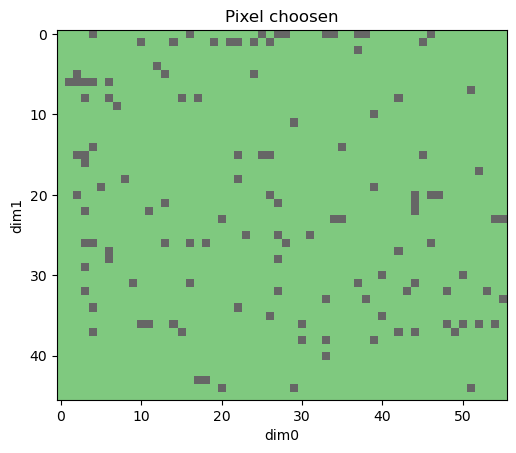

In [24]:
# plot the choosen pixel on canvas
chosen_pixel = np.zeros((46, 56))
for pixel in included:
    chosen_pixel[(pixel-1)//56, (pixel-1) % 56] = 1

plt.imshow(chosen_pixel, cmap='Accent')
plt.title('Pixel choosen')
plt.xlabel('dim0')
plt.ylabel('dim1')
plt.show()

# 2.


In [25]:
volcano_pd = pd.read_csv('Volcano.csv', index_col=None, header=None)
volcano_pd.index = [index for index in range(volcano_pd.shape[0], 0, -1)]
volcano_pd.columns = [col for col in range(1, volcano_pd.shape[1]+1)]
volcano_pd

,1,2,3,4,5,6,7,8,9,10,...,78,79,80,81,82,83,84,85,86,87
61,100,101,102,103,104,105,105,106,107,108,...,100,100,99,99,99,99,98,98,97,97
60,100,101,102,103,104,105,106,107,108,109,...,101,101,100,100,100,99,99,98,98,97
59,101,102,103,104,105,105,106,107,108,109,...,102,101,101,100,100,99,99,98,98,97
58,101,102,103,104,105,106,107,108,109,110,...,102,102,102,101,100,99,99,99,98,98
57,101,102,103,104,105,106,107,108,109,110,...,103,102,102,101,101,100,99,99,99,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,105,106,106,107,107,108,108,109,109,110,...,96,96,96,95,95,94,94,94,94,94
4,105,105,106,106,107,107,108,108,109,109,...,96,96,96,95,95,94,94,94,94,94
3,104,105,105,106,106,107,107,108,108,108,...,96,96,96,95,95,94,94,94,94,94
2,104,104,105,105,106,106,107,107,107,107,...,96,96,95,95,95,94,94,94,94,94


In [26]:
X1_max = volcano_pd.shape[1]
X1_min = 1
X2_max = volcano_pd.shape[0]
X2_min = 1

domain_sizes = np.arange(1, 20, 2)
steps = np.arange(0.5, min(X1_max, X2_max), 0.5)

In [27]:
def distance(current_point, domain_size):
    to_X1_min = current_point[0]-X1_min
    to_X1_max = X1_max-current_point[0]

    to_X2_min = current_point[1]-X2_min
    to_X2_max = X2_max-current_point[1]

    if to_X1_max < (domain_size-1)/2:
        X1_ar = np.arange(
            current_point[0]-(domain_size-1-to_X1_max), current_point[0]+to_X1_max+1)
    elif to_X1_min < (domain_size-1)/2:
        X1_ar = np.arange(
            current_point[0]-to_X1_min, current_point[0]+(domain_size-1-to_X1_min)+1)
    else:
        X1_ar = np.arange(
            current_point[0]-(domain_size-1)/2, current_point[0]+(domain_size-1)/2+1)

    if to_X2_max < (domain_size-1)/2:
        X2_ar = np.arange(
            current_point[1]-(domain_size-1-to_X2_max), current_point[1]+to_X2_max+1)
    elif to_X2_min < (domain_size-1)/2:
        X2_ar = np.arange(
            current_point[1]-to_X2_min, current_point[1]+(domain_size-1-to_X2_min)+1)
    else:
        X2_ar = np.arange(
            current_point[1]-(domain_size-1)/2, current_point[1]+(domain_size-1)/2+1)

    return X1_ar, X2_ar

In [28]:
class GradientDescentLR:
    def __init__(self, learning_rate=0.001, iterations=3000, intercept=0):
        self.learning_rate, self.iterations = learning_rate, iterations
        # self.X=StandardScaler().fit_transform(X)
        # self.y=y
        self.weight_vector = np.random.randn(X.shape[1])
        self.intercept = intercept

    def set_params(self, weight, intercept):
        self.weight_vector = weight
        self.intercept = intercept

    def predict_y(self, X):
        y_pred = []
        for i in range(len(X)):
            y_pred.append(self.weight_vector@X[i]+self.intercept)
        return y_pred

    def loss(self, y, y_pred):
        numberr = len(y)
        square_error_sum = 0
        for i in range(numberr):
            square_error_sum += (y[i]-y_pred[i])**2
        return (1/numberr)*square_error_sum

    def derivative_loss_of_weight(self, X, y, y_pred):
        sum = 0
        number = len(y)
        for i in range(number):
            sum += -X[i]*(y[i]-y_pred[i])

        return 2/number*sum

    def derivative_loss_of_bias(self, y, y_pred):
        number = len(y)
        sum = 0
        for i in range(number):
            sum += -(y[i]-y_pred[i])

        return 2/number*sum

    def fit(self, X, y):
        loss = []
        for i in range(self.iterations):
            y_pred = self.predict_y(X)

            weight_vector = self.weight_vector-self.learning_rate * \
                self.derivative_loss_of_weight(X, y, y_pred)
            intercept = self.intercept-self.learning_rate * \
                self.derivative_loss_of_bias(y, y_pred)

            self.set_params(weight_vector, intercept)
            loss.append(self.loss(y, y_pred))
        # display(y_pred,loss,self.weight_vector,self.intercept)
        return loss, self.weight_vector, self.intercept

In [29]:
domain_sizezz = []
stepzz = []
x2zz = []
x1zz = []
nextx2 = []
nextx1 = []
val = []
de = []
record = pd.DataFrame()

# starting point at the right-bottom corner
i = 0
for domain_size in domain_sizes:
    for step in steps:
        Current_Point = np.array([87, 1])
        while True:

            x1, x2 = distance(Current_Point, domain_size)

            x1 = x1.flatten()
            x2 = x2.flatten()
            y = np.array([volcano_pd.loc[x2[i], x1[i]]
                         for i in range(len(x2))]).T

            X = np.column_stack((x1, x2))
            X = StandardScaler().fit_transform(X)

            GD = GradientDescentLR()
            loss, weight, intercept = GD.fit(X, y)

            next_point = Current_Point+step*weight

            x1_next, x2_next = int(round(next_point[0])), int(
                round(next_point[1]))

            domain_sizezz.append(domain_size)
            stepzz.append(step)
            x2zz.append(Current_Point[1])
            x1zz.append(Current_Point[0])
            nextx2.append(x2_next)
            nextx1.append(x1_next)
            val.append(volcano_pd.loc[Current_Point[1], Current_Point[0]])
            de.append(volcano_pd.max().max() -
                      volcano_pd.loc[Current_Point[1], Current_Point[0]])

            if x1_next < 1 or x1_next > 87 or x2_next < 1 or x2_next > 61:
                break
            elif volcano_pd.loc[x2_next, x1_next] >= volcano_pd.loc[Current_Point[1], Current_Point[0]]:
                Current_Point = np.array([x1_next, x2_next])
            else:
                break
        # print(tuple([domain_size,step]),next_point,weight,intercept)

In [30]:
record['domain size'] = domain_sizezz
record['step'] = stepzz
record['x2'] = x2zz
record['x1'] = x1zz
record['next x2'] = nextx2
record['next x1'] = nextx1
record['value'] = val
record['|maximum of the dataset - value|'] = de

In [31]:
filt = (record['|maximum of the dataset - value|'] < 8)

record__ = record.loc[filt]
filter_ = []
for i in record__.index:
    filt = (record['domain size'] == record.loc[i, 'domain size']) & (
        record['step'] == record.loc[i, 'step'])
    filter_.append(record.loc[filt])

In [32]:
record.sort_values(by='|maximum of the dataset - value|', ascending=True)

,domain size,step,x2,x1,next x2,next x1,value,|maximum of the dataset - value|
1481,13,57.0,31,20,65,-1,195,0
1287,11,52.0,25,21,-110,-90,191,4
1863,17,57.0,36,21,-58,-3,190,5
1298,11,56.0,26,17,287,325,189,6
1266,11,44.5,34,18,109,170,188,7
...,...,...,...,...,...,...,...,...
830,7,40.5,1,87,-10,84,94,101
829,7,40.0,1,87,-10,84,94,101
828,7,39.5,1,87,-14,88,94,101
842,7,44.5,1,87,-16,88,94,101


,domain size,step,x2,x1,next x2,next x1,value,|maximum of the dataset - value|
1265,11,44.5,1,87,34,18,94,101
1266,11,44.5,34,18,109,170,188,7


,domain size,step,x2,x1,next x2,next x1,value,|maximum of the dataset - value|
1286,11,52.0,1,87,25,21,94,101
1287,11,52.0,25,21,-110,-90,191,4


,domain size,step,x2,x1,next x2,next x1,value,|maximum of the dataset - value|
1297,11,56.0,1,87,26,17,94,101
1298,11,56.0,26,17,287,325,189,6


,domain size,step,x2,x1,next x2,next x1,value,|maximum of the dataset - value|
1480,13,57.0,1,87,31,20,94,101
1481,13,57.0,31,20,65,-1,195,0


,domain size,step,x2,x1,next x2,next x1,value,|maximum of the dataset - value|
1862,17,57.0,1,87,36,21,94,101
1863,17,57.0,36,21,-58,-3,190,5


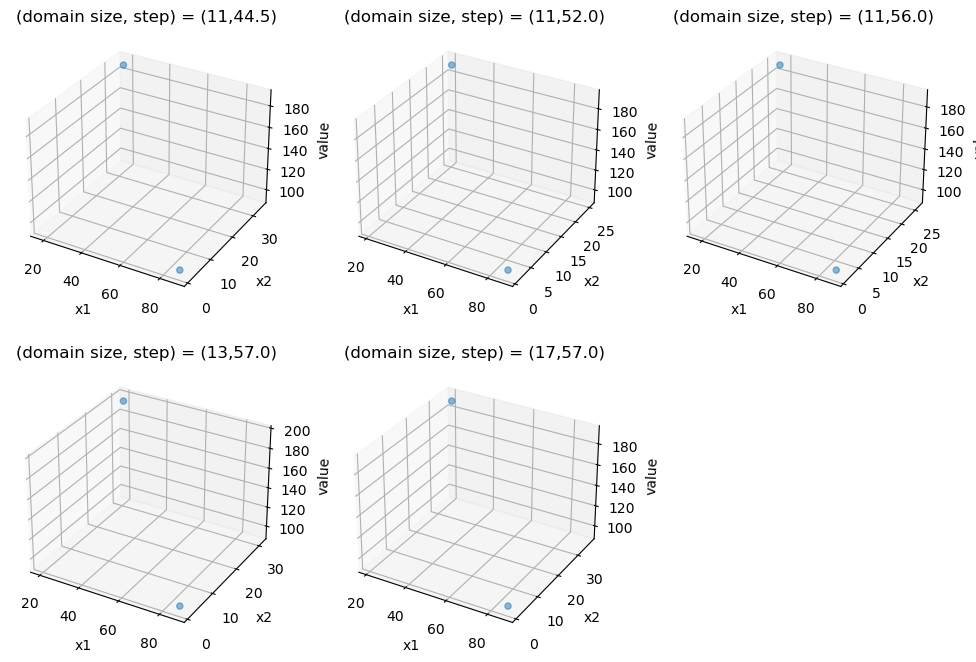

In [33]:
numbers_of_plots = len(filter_)
fig = plt.figure(figsize=(12, 8))
for num in range(len(filter_)):
    j = 231+num
    ax = fig.add_subplot(j, projection='3d')
    display(filter_[num])
    ax.scatter(filter_[num]['x1'], filter_[num]['x2'],
               filter_[num]['value'], alpha=0.5)
    ax.set_title('(domain size, step) = ({},{})'.format(
        filter_[num].iat[0, 0], filter_[num].iat[0, 1]))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('value')

plt.show()

In [34]:
record.to_excel(excel_writer='./record.xlsx', sheet_name='第二題')


# 3.


## (a) regression analysis

x1: 每日工作時數\
x2: 月薪\
y: 使用的電腦螢幕價格


In [68]:
np.random.seed(322915)

x1 = np.random.normal(loc=8, scale=2, size=50000)  # daily work hours
x2 = np.random.normal(loc=32000, scale=7500, size=50000)  # month salary

epsilon = np.random.normal(loc=0, scale=10, size=50000)  # error terms

y = 50+22.4*x1+0.5*x2+epsilon  # used computer price

df = pd.concat([pd.DataFrame(x1, columns=['x1']), pd.DataFrame(
    x2, columns=['x2']), pd.DataFrame(y, columns=['y'])], axis=1)
df.sort_values(by='y', ascending=True)

,x1,x2,y
1988,4.667567,937.854611,617.924626
45365,9.253052,993.871332,766.043251
28578,10.112786,2783.419645,1657.922075
37743,12.573293,3397.109635,2021.855454
28079,6.810861,4057.942493,2233.291368
...,...,...,...
3676,5.958888,58356.642316,29367.992183
47174,6.833716,58545.426772,29477.907667
13608,7.055482,58607.560877,29516.448251
16877,12.244125,58751.212395,29698.983507


In [69]:
X = np.column_stack((x1, x2))
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print('parameters: \n', model.params)
print('adjust R-squared: \n', model.rsquared_adj)
print(model.summary())

parameters: 
 [50.13080971 22.4324313   0.49998956]
adjust R-squared: 
 0.9999929434859115
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.543e+09
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:56:00   Log-Likelihood:            -1.8596e+05
No. Observations:               50000   AIC:                         3.719e+05
Df Residuals:                   49997   BIC:                         3.720e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

<AxesSubplot: >

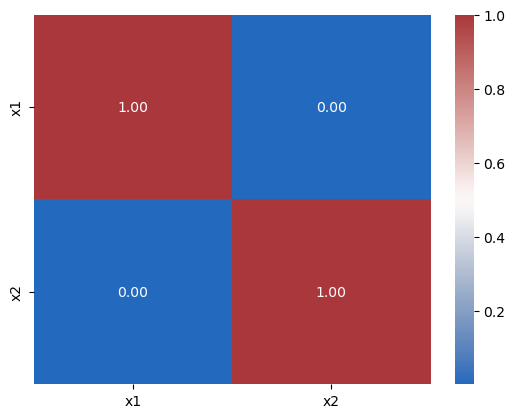

In [37]:
sns.heatmap(pd.concat([pd.DataFrame(x1, columns=['x1']), pd.DataFrame(
    x2, columns=['x2'])], axis=1).corr(), cmap='vlag', annot=True, fmt='.2f')

Text(0.5, 0.92, '3D Scatter plot')

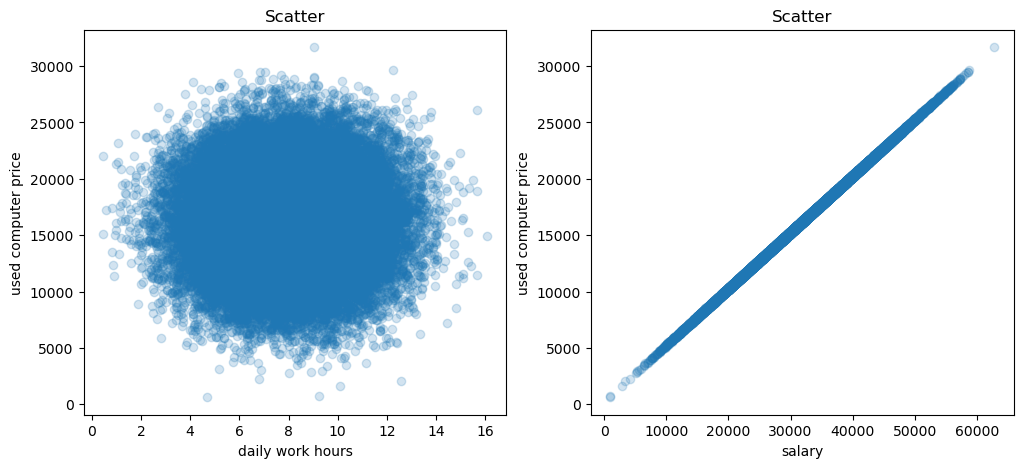

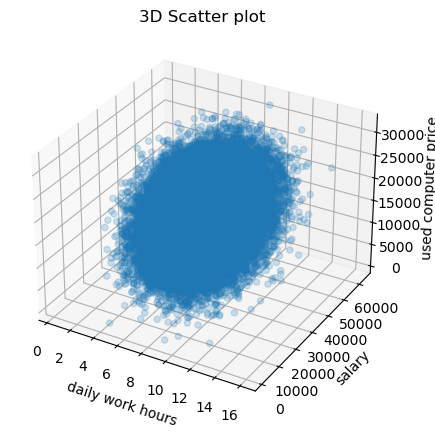

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].scatter(x1, y, alpha=0.2)
ax[0].set_xlabel('daily work hours')
ax[0].set_ylabel('used computer price')
ax[0].set_title('Scatter')

ax[1].scatter(x2, y, alpha=0.2)
ax[1].set_xlabel('salary')
ax[1].set_ylabel('used computer price')
ax[1].set_title('Scatter')

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, alpha=0.2)
ax.set_xlabel('daily work hours')
ax.set_ylabel('salary')
ax.set_zlabel('used computer price')
ax.set_title('3D Scatter plot')

## (b) gradient dscent


In [105]:
X=np.column_stack((x1,x2))
X = StandardScaler().fit_transform(X)
# print(X)
G = GradientDescentLR()
loss, weight, intercept = G.fit(X, y)

[[ 0.41460694  0.47585333]
 [ 2.25798652 -0.07849598]
 [ 0.81009612  1.27284449]
 ...
 [ 1.15753839  1.78458018]
 [ 0.97060859  1.45431129]
 [ 0.6945698  -0.14523992]]


Text(0, 0.5, 'error')

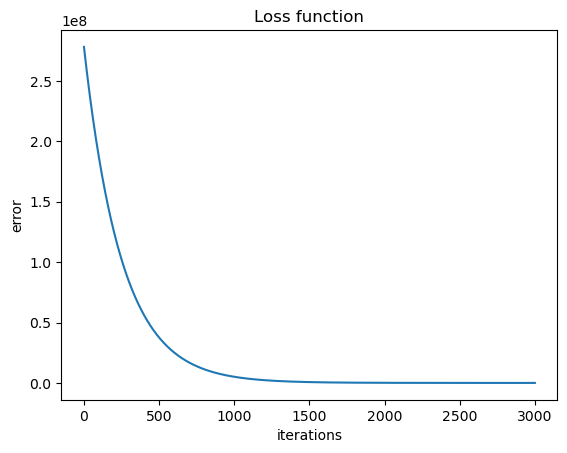

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(range(len(loss)), loss)
ax.set_title('Loss function')
ax.set_xlabel('iterations')
ax.set_ylabel('error')

In [107]:
print('weight: {}\nintercept: {}'.format(weight, intercept))

weight: [  44.93169413 3746.43468559]
intercept: 16210.008645096103
